# Assignment Digital Signal & Image Processing
Giulia Benvenuto s4678610

## Linear Time-Invariant Systems
Compute the convolution product between the functions $f$ and $g$ where $f,g : [a,b] \rightarrow \mathbb{R}$ with: 
<center>
  $f(t)= pe^{qt}sin(ln(1+rt^2))$ <br>
  and <br>
  $g(t)= p_T(t)$
</center>
and $p, q, r$ and $T$ sampled uniformly in the interval $[0,2]$. Here again sample $a$ uniformly in the interval $[-2,-1]$ and $b$ uniformly in the interval $[1,2]$.

Verify that you obtain the same result in both the temporal and the frequency domain.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as signal
from pylab import rcParams
rcParams['figure.figsize'] = 15, 5

## Uniform sampling
$p$, $q$, $r$, $T$, $a$ and $b$ uniformly sampled in their given intervals with the ${\tt numpy.random.uniform}$ function.

In [2]:
p = np.random.uniform(0,2)
q = np.random.uniform(0,2)
r = np.random.uniform(0,2)
T = np.random.uniform(0,2)
a = np.random.uniform(-2,-1)
b = np.random.uniform(1,2)

In [3]:
print('T = {}'.format(T))
print('a = {}'.format(a))
print('b = {}'.format(b))

T = 1.0130836285165628
a = -1.5209800941171325
b = 1.4838252299137198


## Choice of sampling values
Take a point every delta = 0.0001 in a choosen interval of $t$, so we're choosing the points in which our function will be evaluated along the x axis. 

In [4]:
delta = 0.0001

t = np.arange(-8, 8, delta)

# number of samples
print("We consider %d samples"%t.size)

We consider 160000 samples


## Description of the signals
Implementation of the functions called $f(t)$ and $g(t)$, these two functions are defined on the interval $[a,b]$.

Note that $T$ sampled uniformly in the interval $[0,2]$, $a$ is sampled uniformly in $[-2,-1]$ and $b$ is sampled uniformly in the interval $[1,2]$ so it's possible that $T > b$ and $-T < a$ **BUT** $g(t)$ is defined in the interval $[a,b]$ so to handle this case I added an ${\tt if}$ statement which checks if the value of $t$ that is considered is between $a$ and $b$ and if it's smaller than $T$, if it is then we assign to $g(t)$ the value $1$ else the value will be $0$. 

Note that even if the functions are defined over the interval $[a,b]$ I evaluate them over the entire window of time that I considered, and outside that interval I stored in the arrays a sequence of zeros, this is a sort of zero padding I implemented since without it the comparison between convolution in time and product in frequency is wrong because of the way in which the two are computed in python. 

In [5]:
# Definition of the signal f(t):
f_t = np.zeros(len(t))
        
def f(t, a, b):
    for i in range(len(t)):
        if t[i] >= a and t[i] <= b :
            f_t[i] = p * (np.exp(q * t[i])) * (np.sin(np.log(1 + (r * (t[i])**2))))
        else : f_t[i] = 0
    return f_t


# Definition of the signal g(t):
g_t = np.zeros(len(t))

def g(t, T, a, b):
    for i in range(len(t)):
        if t[i] >= a and t[i] <= b :
            if abs(t[i]) <= T : g_t[i] = 1
            else : g_t[i] = 0  
        else : f_t[i] = 0
    return g_t

In [6]:
# Evaluation of the functions:
f_t = f(t, a, b)
g_t = g(t, T, a, b)

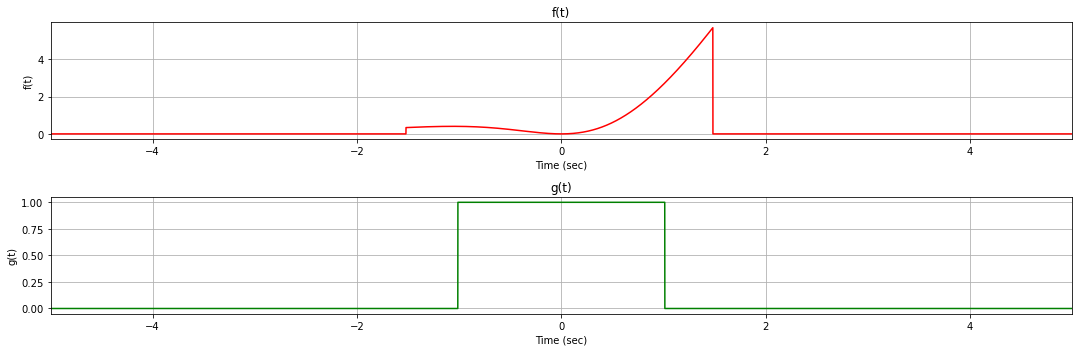

In [7]:
# Plot f(t):
plt.subplot(2, 1, 1)
plt.plot(t, f_t, color='r')
plt.title('f(t)')
plt.xlabel("Time (sec)")
plt.ylabel("f(t)")
plt.xlim(-5, +5)
plt.grid(True)
plt.tight_layout()

# Plot g(t):
plt.subplot(2, 1, 2)
plt.plot(t, g_t, color='g')
plt.title('g(t)')
plt.xlabel("Time (sec)")
plt.ylabel("g(t)")
plt.xlim(-5, +5)
plt.grid(True)
plt.tight_layout()

plt.show()

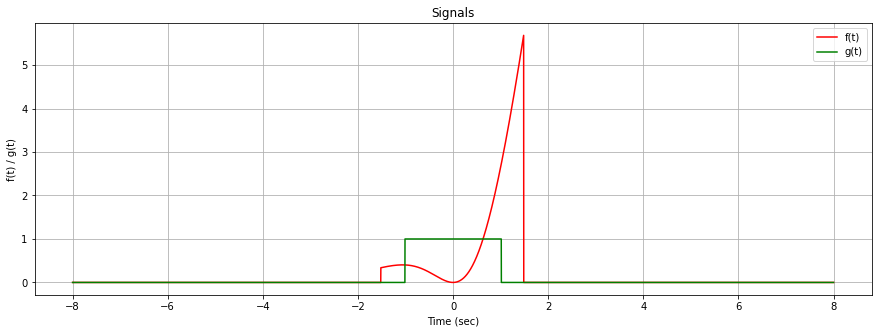

In [8]:
# Plot the two functions:
plt.plot(t, f_t, label='f(t)', color='r')
plt.plot(t, g_t, label='g(t)', color='g')
plt.legend(loc='upper right')
plt.title("Signals")
plt.xlabel("Time (sec)")
plt.ylabel("f(t) / g(t)")
plt.grid(True)
plt.show()

## Convolution between f(t) and g(t)
In the time domain, convolution is an operation that combines two functions, $f(t)$ and $g(t)$, to create a third function, $h(t)$. The convolution of two functions is defined as the integral of the product of one function with a time-reversed version of the other function, shifted by a variable $\tau$. So, mathematically the convolution is:
<center>
    $h(t) = f(t) * g(t) = \int_{-\infty}^\infty f(\tau) g(t - \tau) d\tau $
<\center>

In simpler words, the convolution operation slides one function over the other and multiplies their values at each position, then integrate the resulting values over the entire domain.

In [9]:
conv = np.convolve(f_t, g_t, mode='same')

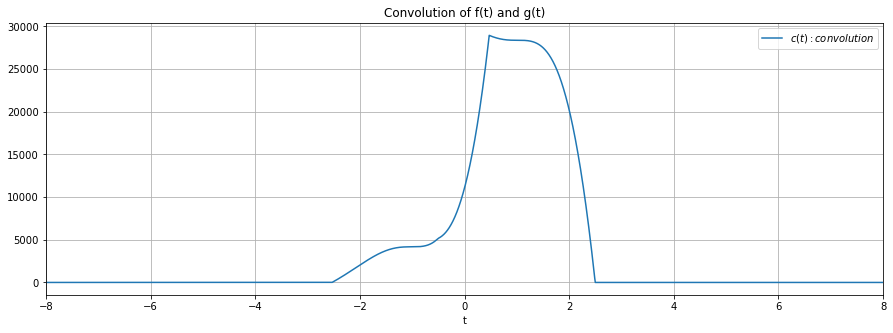

In [10]:
plt.figure(figsize=(15, 5))
plt.plot(t, conv, label="$c(t): convolution$")
plt.title("Convolution of f(t) and g(t)")
plt.xlim(-8, +8)
plt.xlabel('t')
plt.legend()
plt.grid()
plt.show()

## Convolution Theorem
Now we have to verify that you obtain the same result in both the temporal and the frequency domain. This means that we have to verify the *Convolution Theorem* which states that:
- $x(t) \ast y(t) \longleftrightarrow X(f)Y(f)$
- $x(t)y(t) \longleftrightarrow X(f) \ast Y(f)$

So the Fourier transform of the convolution of two functions is equal to the product of their individual Fourier transforms. 

In order to verify it I followed these steps:
- I computed the Fourier Transform of $f(t)$ and $g(t)$ getting $F(w)$ and $G(w)$
- I multiplied $F(w)$ and $G(w)$ 
- I applied the Inverse Fourier Transform to get back into the time domain
- I shifted the result because the output of the Inverse Fourier Transform is not centered in zero, this means that the zero-frequency component (DC component) in not at the center of the time domain signal. 

In [11]:
F = np.fft.fft(f_t)
G = np.fft.fft(g_t)

FG = np.multiply(F, G)

FG_inverse = np.fft.ifft(FG)
FG_shift = np.fft.fftshift(FG_inverse)

# Array of frequencies values:
N = len(t)
freq = np.fft.fftfreq(N, delta)

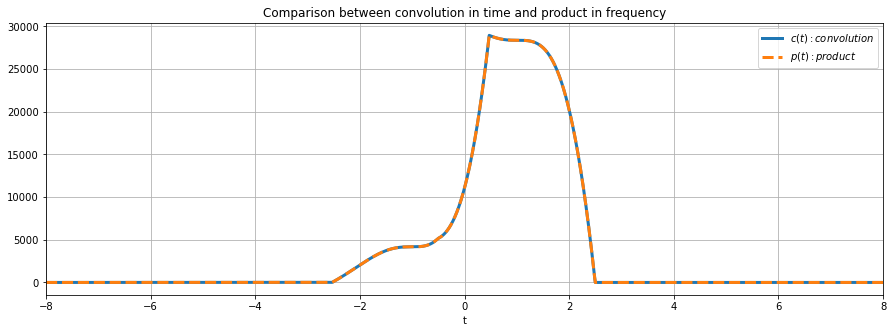

In [12]:
plt.figure(figsize=(15, 5))
plt.title("Comparison between convolution in time and product in frequency")
plt.plot(t, conv, linewidth = '3', label=r"$c(t): convolution$")
plt.plot(t, np.real(FG_shift), linewidth = '3',  linestyle = 'dashed', label=r"$p(t): product$")
plt.xlim(-8, +8)
plt.xlabel('t')
plt.legend()
plt.grid()
plt.show()

## Final Comment
As we can see, the convolution in time between $f(t)$ and $g(t)$ and the product in frequency between $F(w)$ and $G(w)$ are equal, so we obtained the same result in both the temporal and the frequency domain, this meas that the *Convolution Theorem* is verified. 